In [18]:
library(repr)
library(tidyverse)
library(ggplot2)
options(repr.matrix.max.rows = 6)

## Individual Planning Report

GitHub repository: https://github.com/wandereryiu/zhao-yiyu-project-report-group38

In [15]:
players_data <- read_csv("data/players.csv")

sessions_data <- read_csv("data/sessions.csv") # Not needed for current report

players_data

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


### Data Description

#### Issues with Data

An issue that I notice with the data set given is that there are observations of players with 0.0 hours played hours, which I assume means that they did not contribute data. In this case, it may be better to exclude these observations from the data when computing summary statistics.

There are also some observations in which players do not have an age, which could also affect the data. These observations may also be excluded.

For now, I will ignore name and hashedEmail in computing summary statistics.


In [64]:
# Filter out unwanted data

players_filtered <- players_data |>
    filter(played_hours != 0.0, 
           !is.na(Age)) |>
    select(-hashedEmail, -name)

players_filtered

experience,subscribe,played_hours,gender,Age
<chr>,<lgl>,<dbl>,<chr>,<dbl>
Pro,TRUE,30.3,Male,9
Veteran,TRUE,3.8,Male,17
Amateur,TRUE,0.7,Female,21
⋮,⋮,⋮,⋮,⋮
Veteran,TRUE,0.1,Female,44
Veteran,FALSE,0.3,Male,22
Amateur,FALSE,2.3,Male,17


In [67]:
# Perform summary statistics

played_hours_summary <- players_filtered |>
    summarise(
        average_played_hours = mean(played_hours),
        median_played_hours = median(played_hours),
        min_played_hours = min(played_hours),
        max_played_hours = max(played_hours),
        sd_played_hours = sd(played_hours))

age_summary <- players_filtered |>
    summarise(
        average_age = mean(Age),
        median_age = median(Age),
        min_age = min(Age),
        max_age = max(Age),
        sd_age = sd(Age))

subscribed_count <- players_filtered |>
    group_by(subscribe) |>
    summarise(count = n())

experience_level_count <- players_filtered |>
    group_by(experience) |>
    summarise(count = n())

gender_count <- players_filtered |>
    group_by(gender) |>
    summarise(count = n())

played_hours_summary

age_summary

subscribed_count

experience_level_count

gender_count

average_played_hours,median_played_hours,min_played_hours,max_played_hours,sd_played_hours
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
10.50917,0.5,0.1,223.1,37.4496


average_age,median_age,min_age,max_age,sd_age
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
21.30275,20,9,58,7.652771


subscribe,count
<lgl>,<int>
FALSE,25
TRUE,84


experience,count
<chr>,<int>
Amateur,35
Beginner,19
Pro,10
Regular,19
Veteran,26


gender,count
<chr>,<int>
Agender,1
Female,21
Male,75
Non-binary,6
Prefer not to say,5
Two-Spirited,1


In [49]:
percentage_subscribed <- 84/109 *100 

experience_percentage <- (26+35)/109 *100

male_percentage <- 75/109 *100

percentage_subscribed

experience_percentage

male_percentage

[1] 77.06422

[1] 55.9633

[1] 68.80734

#### Data Description

The original data set of players.csv had 196 observations. After removing observations in which the played hours was 0.0 and the age was NA, there were 109 observations remaining. 

**Overview of Played Hours and Age Statistics:**
Variable | Average | Median | Minimum | Max | Standard Deviation
--- | --- | --- | ---| --- | ---
Played hours | 10.51 | 0.50 | 0.10 | 223.10 | 37.45
Age | 21.302 | 20 | 9 | 58 | 7.65


<br>
After performing summary statistics, we can observe that:

- Approximately 77.06% of participants are subscribed to a gaming-related newsletter
- Approximately 55.96% of participants are male
- Approximately 68.81% of participants are either Amateur or Veteran gamers


### Data Analysis and Visualization

The broad question I will be be addressing is:

**1. What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?**

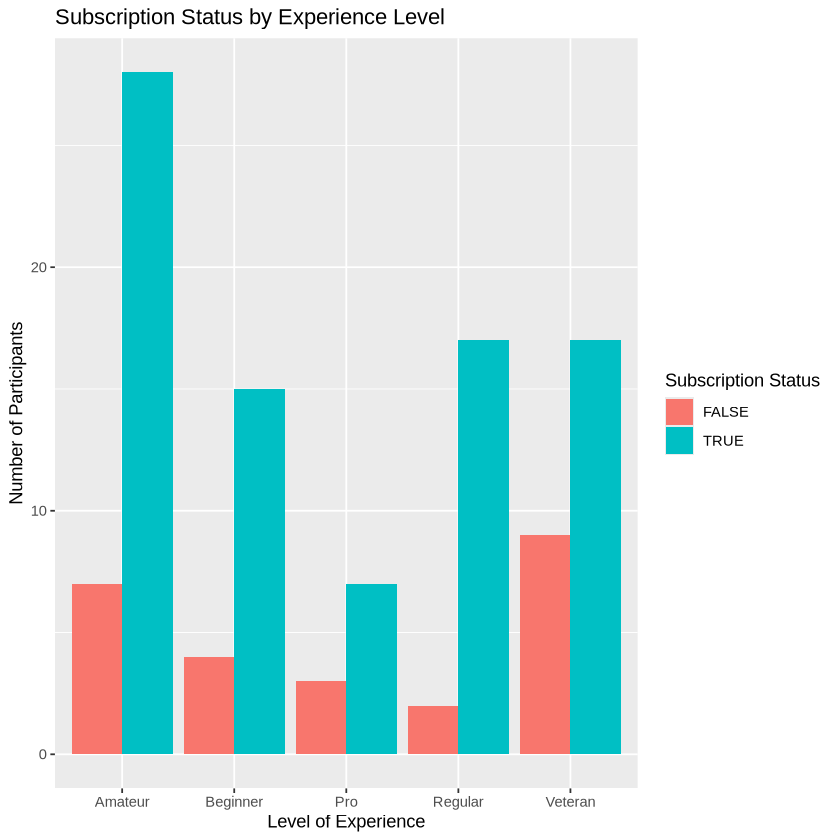

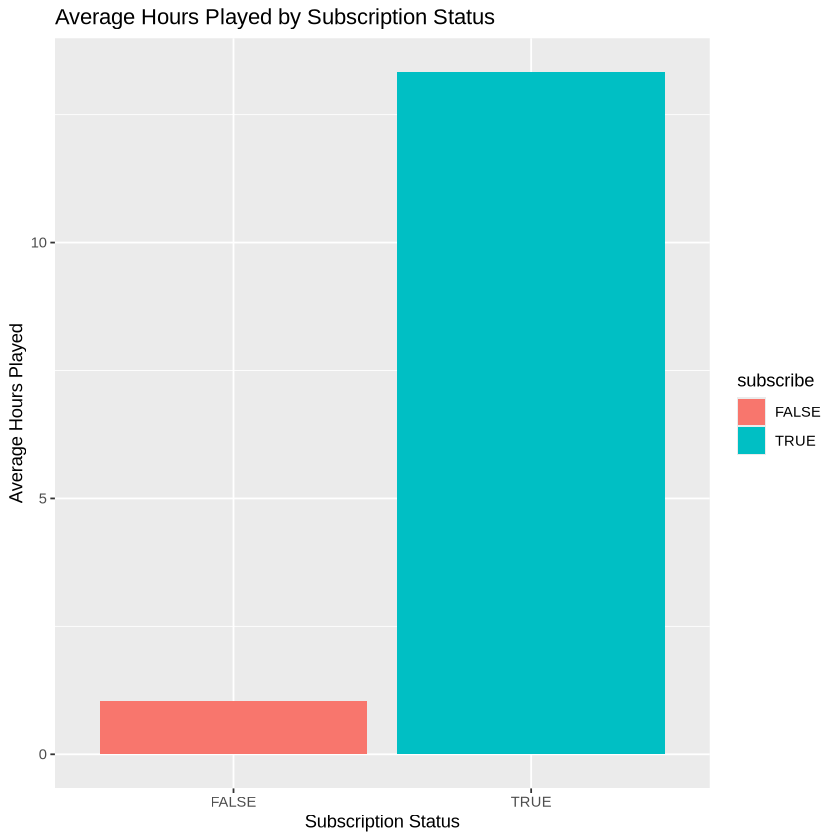

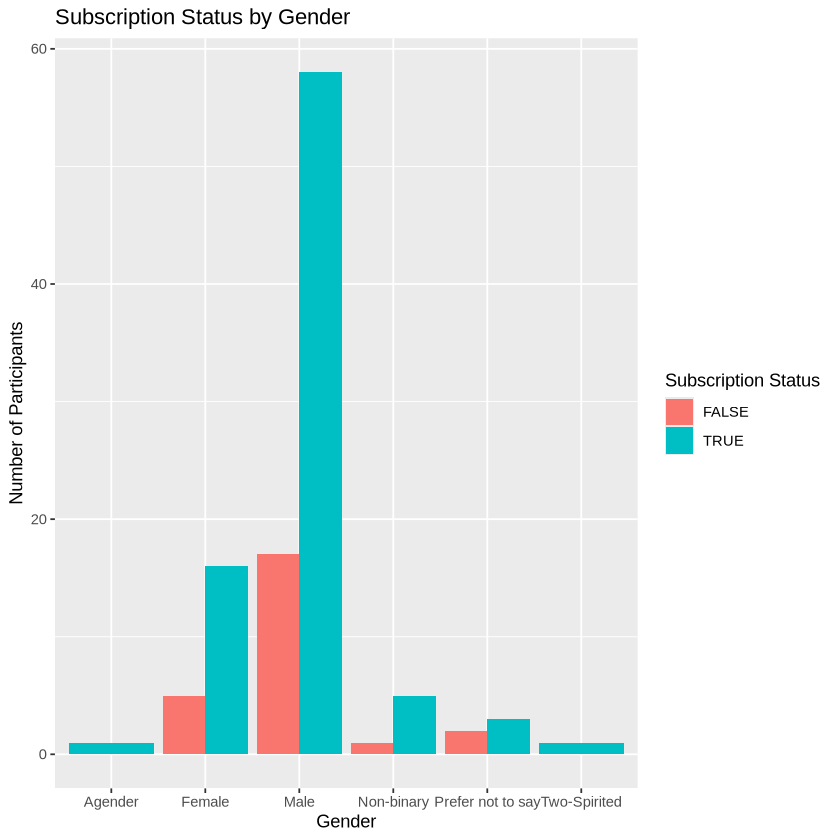

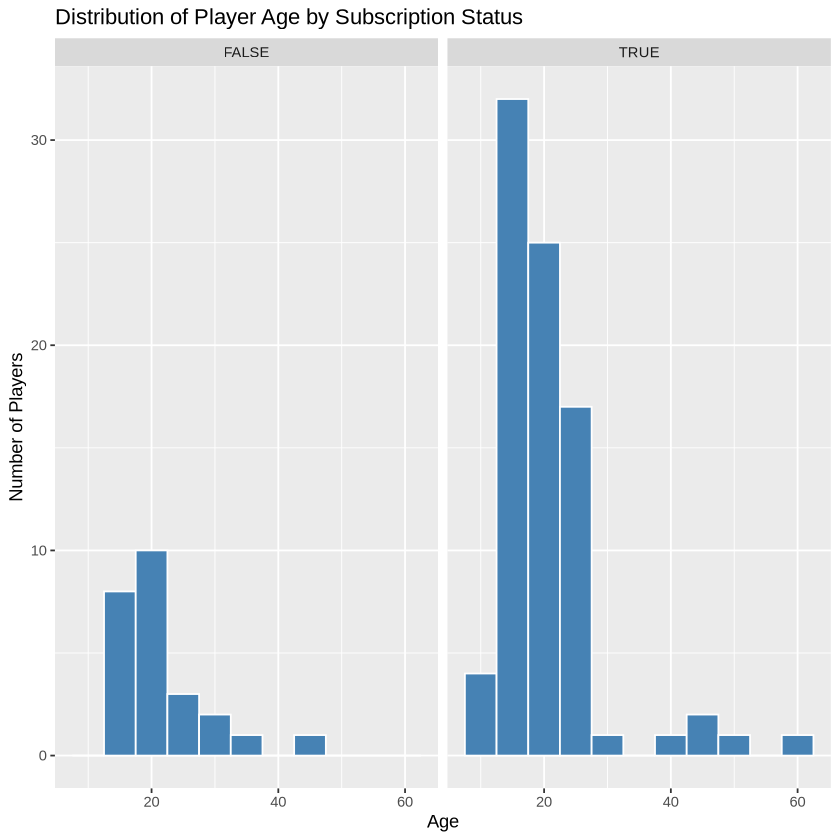

In [76]:
# Visualizations

# Comparing between the variables: 
# experience, played_hours, gender, and age 
# vs. subscription status

# Create a dataset for visualization that shows the average hours played between two groups:
# Subscribed vs. not subscribed to gaming-related newsletters
average_hours <- players_filtered |>
    group_by(subscribe) |>
    summarise(avg_hours = mean(played_hours))

# experience
experience_bar_chart <- ggplot(players_filtered, aes(x = experience, fill = subscribe)) +
    geom_bar(position = "dodge") +
    labs(x = "Level of Experience", y = "Number of Participants", 
         fill = "Subscription Status",
         title = "Subscription Status by Experience Level")

# played_hours
played_hours_plot <- ggplot(average_hours, aes(x = subscribe, y = avg_hours, fill = subscribe)) +
    geom_bar(stat = "identity") +
    labs(x = "Subscription Status", y = "Average Hours Played", 
         title = "Average Hours Played by Subscription Status")

# gender
gender_plot <- ggplot(players_filtered, aes(x = gender, fill = subscribe)) +
    geom_bar(position = "dodge") +
    labs(x = "Gender", y = "Number of Participants", 
         fill = "Subscription Status",
         title = "Subscription Status by Gender")

# age
age_chart <- ggplot(players_filtered, aes(x = Age)) +
    geom_histogram(binwidth = 5, fill = "steelblue", color = "white") +
    facet_wrap(~ subscribe) +
    labs(x = "Age", y = "Number of Participants",
    title = "Distribution of Age by Subscription Status") 

experience_bar_chart

played_hours_plot

gender_plot

age_chart

The question I have formulated based on my visualizations is:

**Can the number of hours played predict subscription to gaming-related newsletters in the observed players?**